## Novartis Hiring Challenge



<img src="Novartis.png">

# The dataset / EDA
<p>
We are provided with three datasets primarily, the Train.csv, Test.csv, and sample_submission.csv <br>
Let's do some basic analysis on these files

In [4]:
import pandas as pd
train = pd.read_csv("../input/Train.csv")
test = pd.read_csv("../input/Test.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")

In [5]:
# Let's have a look at the shape of the dataframe
print(f"The shape of train dataframe is : {train.shape}")
print(f"The shape of test dataframe is : {test.shape}")

The shape of train dataframe is : (23856, 18)
The shape of test dataframe is : (15903, 17)


In [6]:
# Let's list out the columns of the dataframes
print(f'columns : {train.columns}')

columns : Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')


As we can see, the main features that we have to take into consideration are X_1, X_2,....X_15 <br>
MULTIPLE_OFFENSE --> is the target column, which has values 1/0, (1--> offence, 0--> not an offence)

In [7]:
# Let's have a look at the distribution of the target labels
print(f"The value counts per label in train dataframe : \n{train.MULTIPLE_OFFENSE.value_counts()}")
print(f"There are total of {(train.MULTIPLE_OFFENSE.value_counts()[0]/(train.MULTIPLE_OFFENSE.value_counts()[0]+train.MULTIPLE_OFFENSE.value_counts()[1]))} percentage of 0 labels")
print(f"There are total of {(train.MULTIPLE_OFFENSE.value_counts()[1]/(train.MULTIPLE_OFFENSE.value_counts()[0]+train.MULTIPLE_OFFENSE.value_counts()[1]))} percentage of 1 labels")

The value counts per label in train dataframe : 
1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64
There are total of 0.04476861167002012 percentage of 0 labels
There are total of 0.9552313883299799 percentage of 1 labels


Therefore, it is quite apparent that the class imbalance is need to be dealt with. <p>
Let's analyze the labels individually first

Before proceeding forward, let us quickly check for null values first

In [8]:
print("Checking for null values in the training data")
print(train.isnull().sum().T)

Checking for null values in the training data
INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64


In [9]:
print("Checking for null values in the testing data")
print(test.isnull().sum().T)

Checking for null values in the testing data
INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64


So the class X_12 indeed has some null values that we can work on, but we will have to analyze the data first, as the way we deal with the null values depends on the way we are treating our data. <p>
Owing to the fact that the parameters are unknown to us, we will have to make our own assumption (of whether the data is categorical / numerical etc)

In [10]:
# Let's use the .describe() method of the pandas dataframe to get a short summary
print(train.describe())

X_1           X_2           X_3           X_4           X_5  \
count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
mean       0.483778     24.791206     24.637450      4.276744      2.455609   
std        1.439738     15.240231     15.135093      2.944672      1.963095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      7.000000      8.000000      2.000000      1.000000   
50%        0.000000     24.000000     24.000000      4.000000      3.000000   
75%        0.000000     36.000000     35.000000      6.000000      5.000000   
max        7.000000     52.000000     52.000000     10.000000      5.000000   

                X_6           X_7           X_8           X_9          X_10  \
count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
mean       6.154175      4.876509      0.972460      4.924128      1.244802   
std        4.471756      3.881931      1.453144      1.362625      

In [11]:
print(test.describe())

X_1           X_2           X_3           X_4           X_5  \
count  15903.000000  15903.000000  15903.000000  15903.000000  15903.000000   
mean       0.468088     24.722631     24.575049      4.284223      2.448469   
std        1.412112     15.228841     15.127451      2.974584      1.963372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      7.000000      8.000000      2.000000      1.000000   
50%        0.000000     24.000000     24.000000      4.000000      3.000000   
75%        0.000000     36.000000     35.000000      6.000000      5.000000   
max        7.000000     52.000000     52.000000     10.000000      5.000000   

                X_6           X_7           X_8           X_9          X_10  \
count  15903.000000  15903.000000  15903.000000  15903.000000  15903.000000   
mean       6.084890      4.862605      0.986732      4.908759      1.241212   
std        4.451117      3.854550      1.471274      1.374677      

In [12]:
# Let's have a look at the number of unique entries in the train and the test data
print("In the train dataframe:")
for i in range(1,16):
    val = train[f'X_{i}'].unique().shape[0]
    print(f'The number of unique entries in X_{i} column is : {val}')

In the train dataframe:
The number of unique entries in X_1 column is : 8
The number of unique entries in X_2 column is : 52
The number of unique entries in X_3 column is : 52
The number of unique entries in X_4 column is : 10
The number of unique entries in X_5 column is : 5
The number of unique entries in X_6 column is : 19
The number of unique entries in X_7 column is : 19
The number of unique entries in X_8 column is : 24
The number of unique entries in X_9 column is : 7
The number of unique entries in X_10 column is : 24
The number of unique entries in X_11 column is : 133
The number of unique entries in X_12 column is : 24
The number of unique entries in X_13 column is : 60
The number of unique entries in X_14 column is : 62
The number of unique entries in X_15 column is : 28


In [13]:
# Let's have a look at the number of unique entries in the train and the test data
print("In the train dataframe:")
for i in range(1,16):
    val = test[f'X_{i}'].unique().shape[0]
    print(f'The number of unique entries in X_{i} column is : {val}')

In the train dataframe:
The number of unique entries in X_1 column is : 8
The number of unique entries in X_2 column is : 52
The number of unique entries in X_3 column is : 52
The number of unique entries in X_4 column is : 10
The number of unique entries in X_5 column is : 5
The number of unique entries in X_6 column is : 19
The number of unique entries in X_7 column is : 19
The number of unique entries in X_8 column is : 22
The number of unique entries in X_9 column is : 7
The number of unique entries in X_10 column is : 18
The number of unique entries in X_11 column is : 106
The number of unique entries in X_12 column is : 18
The number of unique entries in X_13 column is : 54
The number of unique entries in X_14 column is : 51
The number of unique entries in X_15 column is : 29


So most of the variables take quite discrete entries, especially when compared to the total training size <br>
Therefore, I have decided to go forward with treating all the variables as **categorical** <p>
Also, as I do not know anything about the variables, it is all but natural to not assume any ordering in the data (in the form of ordinal categorical variables etc)

As we are considering all the variables as categorical, We can fill the NA values in X_11 with a placeholder entry, of say -99999

In [14]:
train.X_12 = train.X_12.fillna("-999999")
test.X_12 = test.X_12.fillna("-999999")

Okay, so one more thing that we should be careful about is that all the entries of the testing set should be present in the training set.

In [15]:
for i in range(1,16):
    s_tr = set(train[f'X_{i}'].tolist())
    s_te = set(test[f'X_{i}'].tolist())
    difference = list(s_te.difference(s_tr))
    print(f"The set difference for column X_{i} is {difference}")

The set difference for column X_1 is []
The set difference for column X_2 is []
The set difference for column X_3 is []
The set difference for column X_4 is []
The set difference for column X_5 is []
The set difference for column X_6 is []
The set difference for column X_7 is []
The set difference for column X_8 is [40, 25, 18]
The set difference for column X_9 is []
The set difference for column X_10 is [28, 14]
The set difference for column X_11 is [129, 66, 134, 72, 138, 139, 202, 269, 112, 83, 275, 307, 215, 153, 251, 317, 286]
The set difference for column X_12 is [18.0]
The set difference for column X_13 is [68, 101, 39, 79, 52, 117, 23, 91]
The set difference for column X_14 is [71, 10, 106, 110, 85, 22, 122]
The set difference for column X_15 is [1, 2, 3, 33, 42, 11, 47, 25]


Okay so interestingly for class X_8, X_11, X_12, X_13, X_14, and X_15 there exist some entries which are present in test set but not in the training set. Therefore, the strategy to adopt here will be concatenating the training and testing set and then encoding these values. Which will be done a little later, first let's look at some plots to understand how the values are distributed in the training and testing sets

<Figure size 432x288 with 0 Axes>

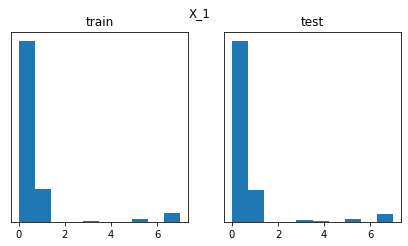

<Figure size 432x288 with 0 Axes>

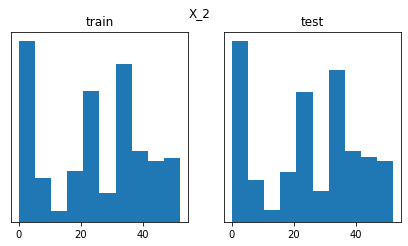

<Figure size 432x288 with 0 Axes>

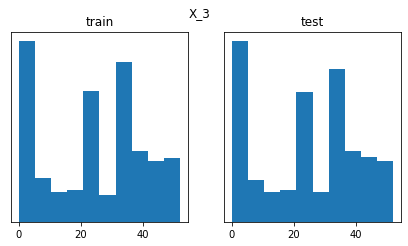

<Figure size 432x288 with 0 Axes>

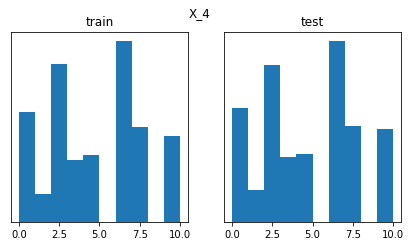

<Figure size 432x288 with 0 Axes>

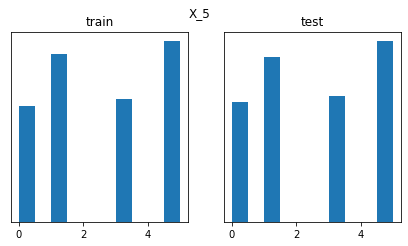

<Figure size 432x288 with 0 Axes>

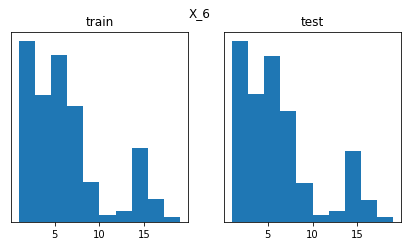

<Figure size 432x288 with 0 Axes>

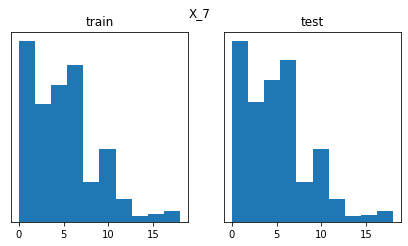

<Figure size 432x288 with 0 Axes>

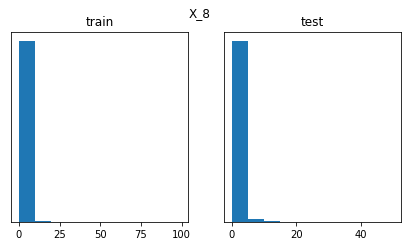

<Figure size 432x288 with 0 Axes>

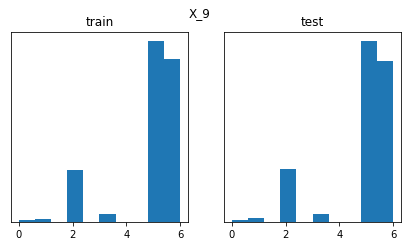

<Figure size 432x288 with 0 Axes>

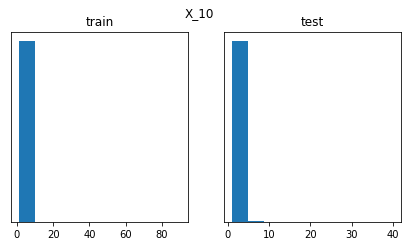

<Figure size 432x288 with 0 Axes>

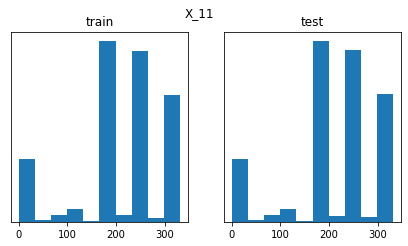

Cannot plot for X_12


<Figure size 432x288 with 0 Axes>

<Figure size 504x252 with 0 Axes>

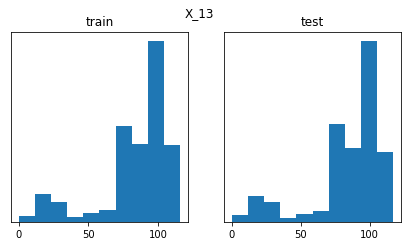

<Figure size 432x288 with 0 Axes>

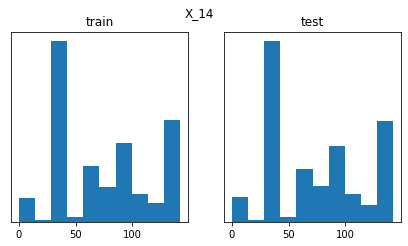

<Figure size 432x288 with 0 Axes>

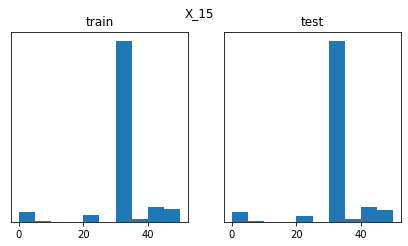

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_subplot(train, test, col):
    try:
        plt.clf()
        fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))
        fig.suptitle(col)
        ax0.hist(train[col])
        ax0.set_title("train")
        ax0.set_yticks([])
        ax1.hist(test[col])
        ax1.set_title("test")
        ax1.set_yticks([])
        plt.show()
    except Exception as e:
        print(f"Cannot plot for {col}")

for i in range(1,16):
    plot_subplot(train, test, f'X_{i}')

Just by observing the plots above, it is quite obvious that the distribution of the data is pretty much the same in both training and testing dataset. Or we can say that the distribution of each feature was from a similar population. Therefore, we can expect some nice results (from train --> test)

Let's try to find correlation betweem the features, We will use spearman's correlation (it is the standard procedure to find correlation b/w the categorical variables)

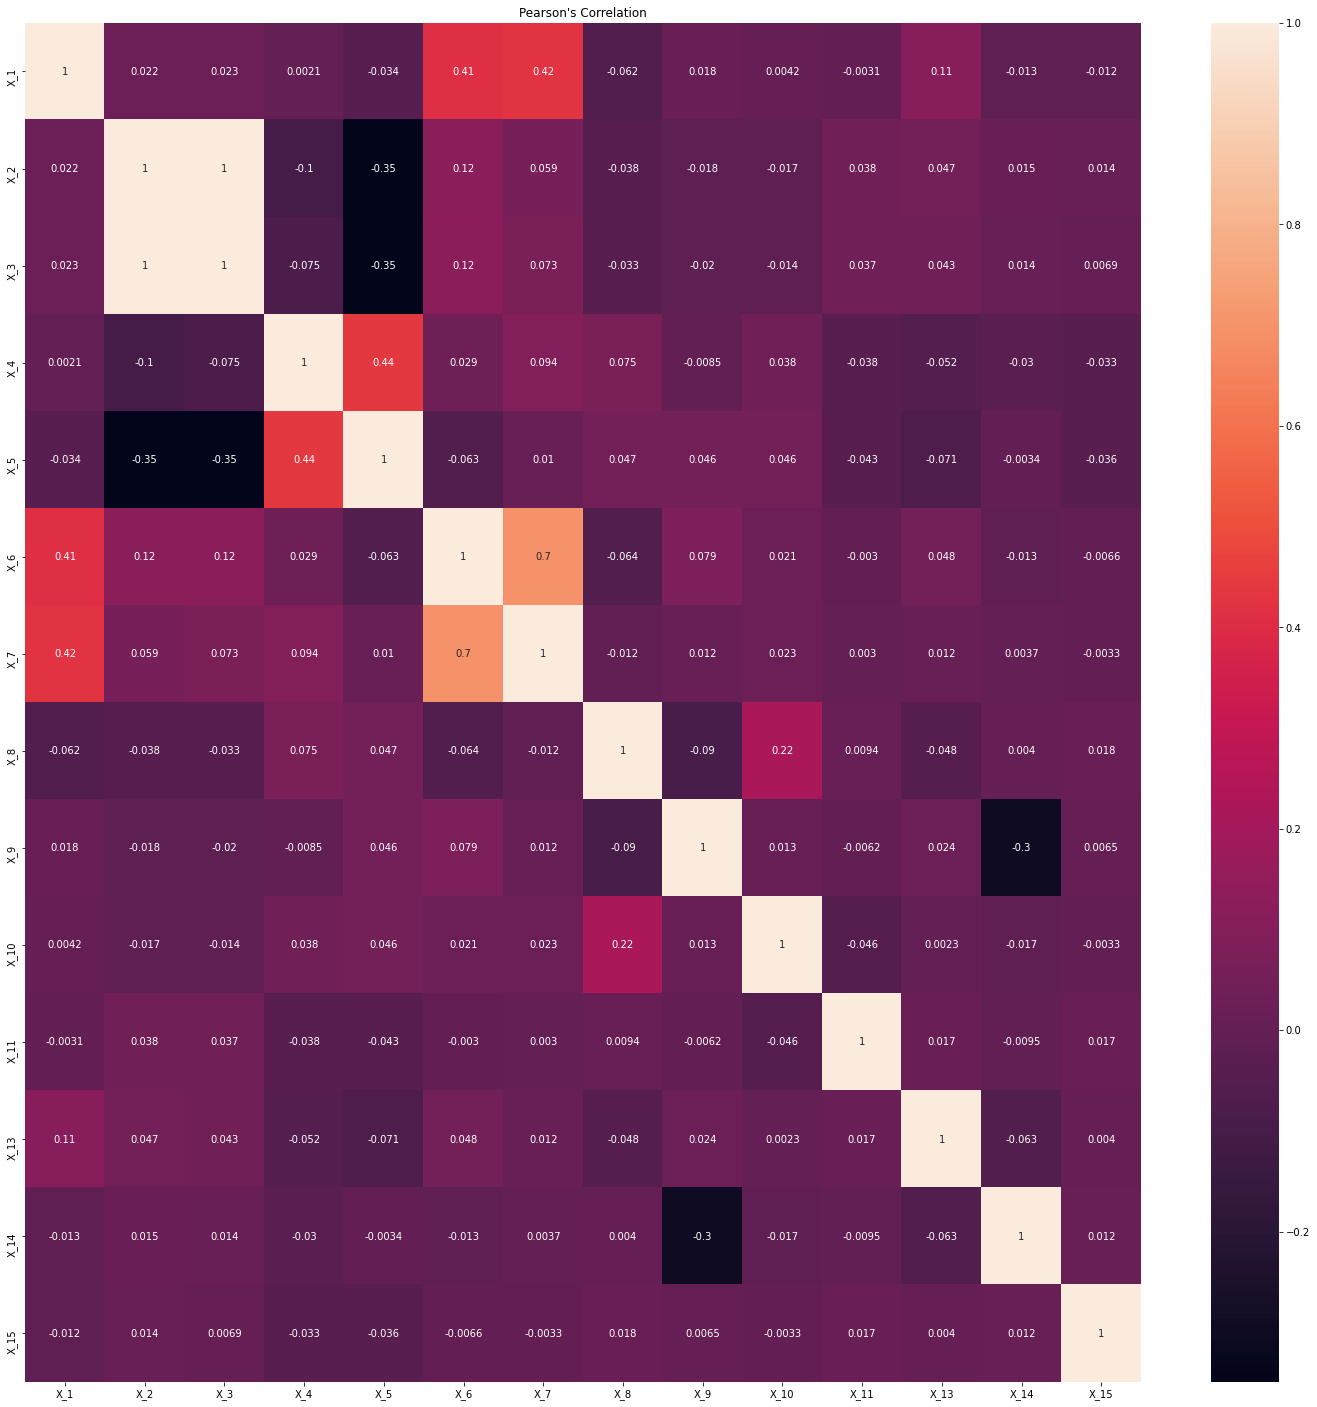

In [17]:
cat_cols = [c for c in train.columns if (c.find("X_")!=-1 and c!='X_12')]
correlations = train[cat_cols].corr()
import seaborn as sns
f,ax = plt.subplots(figsize=(25,25))
plt.title("Pearson's Correlation")
sns.heatmap(correlations, annot=True)

There seems to be somewhat of a convincing correlation between a few variables, although correlation is not equal to causation, therefore we will keep in mind that there might be some multicollinearity, and we have to apply regularization.

# Cross Validation Strategy

When we are tackling machine learning problems, having a strong cross validation strategy is perhaps the most important thing. Therefore, we will try and incorporate that in our problem

In [97]:
train = pd.read_csv("../input/Train.csv")
test = pd.read_csv("../input/Test.csv")
from sklearn import model_selection
train['kfold'] = -1
train = train.sample(frac=1).reset_index(drop=True)
kf = model_selection.StratifiedKFold(n_splits=5, shuffle=False)
for fold, (train_idx, val_idx) in enumerate(kf.split(X = train, y = train.MULTIPLE_OFFENSE.values)):
    print(f"fold {fold}")
    print(len(train_idx), len(val_idx))
    train.loc[val_idx, 'kfold'] = fold

fold 0
19084 4772
fold 1
19085 4771
fold 2
19085 4771
fold 3
19085 4771
fold 4
19085 4771


Now we have stratified K fold cross validation scheme intact with us, therefore we will be able to test our models efficiently. Moving forward.

# Handling Categorical Variables

As we know that we have categorical variables, we will have to deal with them properly <p>
We can approach the handling of categorical variables in many ways, I will be using a helper class to handle the categorical encodings<br>
It was originally provided by Abhishek Thakur in his applied machine learning series: <br>
Link: https://github.com/abhishekkrthakur/mlframework/blob/master/src/categorical.py 

In [98]:
class CategoricalFeatures:

    def __init__(self, df, categorical_features, encoding_type, handle_na=False):
        """init function for the generic class to handle categorical features

        Args:
            df (pandas dataframe): The data to be encoded
            categorical_features (list(string)): All the features to be encoded
            encoding_type (string): The encoding that we need to perform
            handle_na (bool, optional): Whether to handle na values or not. Defaults to False.
        """
        self.df = df
        self.cat_feats = categorical_features
        self.enc_type = encoding_type
        self.handle_na = handle_na
        self.label_encoders = dict()
        self.binary_encoders = dict()
        self.ohe = None

        if self.handle_na:
            for c in self.cat_feats:
                self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna("-9999999")
        self.output_df = self.df.copy(deep=True)

    
    def _label_binarizer(self):
        for c in self.cat_feats:
            lbl = preprocessing.LabelBinarizer()
            lbl.fit(self.df[c].values)
            val = lbl.transform(self.df[c].values)
            self.output_df = self.output_df.drop(c, axis=1)
            for j in range(val.shape[1]):
                new_col_name = c + f"__bin_{j}"
                self.output_df[new_col_name] = val[:,j]
            self.binary_encoders[c] = lbl
        return self.output_df


    def _label_encoding(self):
        for c in self.cat_feats:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
            self.label_encoders[c] = lbl
        return self.output_df
    

    def _one_hot(self):
        ohe = preprocessing.OneHotEncoder()
        ohe.fit(self.df[self.cat_feats].values)
        return ohe.transform(self.df[self.cat_feats].values)
    

    def fit_transform(self):
        if self.enc_type == "label":
            return self._label_encoding()
        elif self.enc_type == "binary":
            return self._label_binarizer()
        elif self.enc_type == "ohe":
            return self._one_hot()
        else:
            raise Exception("Encoding type not understood")
    

    def transform(self, dataframe):
        if self.handle_na:
            for c in self.cat_feats:
                self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna("-9999999")

        if self.enc_type=="label":
            for c,lbl in self.label_encoders.items():
                dataframe.loc[:,c] = lbl.transform(dataframe[c].values)
            return dataframe
        
        elif self.enc_type=="binary":
            for c, lbl in self.binary_encoders.items():
                val = lbl.transform(dataframe[c].values)
                dataframe = dataframe.drop(c, axis=1)

                for j in range(val.shape):
                    new_col_name = c + f"__bin_{j}"
                    dataframe[new_col_name] = val[:,j]
            return dataframe
        
        elif self.enc_type == "ohe":
            return self.ohe(dataframe[self.cat_feats].values)
        
        else:
            raise Exception("Encoding type not understood")


As we saw that there are some values present only in the test data and not in the training data, therefore, we will have to merge the train and test data and then perform any kind of encoding. This would ensure that the data is not corrupted in the process of encoding.

In [100]:
import joblib
from sklearn import preprocessing
df = train.copy()
original_train_cols = df.columns
df['tr'] = 1 # Indicator that the entry belongs to the training data
df_test = pd.read_csv("../input/Test.csv")
original_test_cols = df_test.columns
df_test['kfold'] = -1
df_test['MULTIPLE_OFFENSE'] = -1
df_test['tr'] = -1
df = pd.concat([df, df_test]).reset_index(drop=True)
cat_cols = [c for c in df.columns if c not in ["INCIDENT_ID", "DATE", "MULTIPLE_OFFENSE", "kfold", "tr"]]
cat_feats = CategoricalFeatures(df,
                                categorical_features=cat_cols,
                                encoding_type="label",
                                handle_na=True)
df_transformed = cat_feats.fit_transform()
X = df_transformed.loc[df_transformed.tr==1,:]
X_test = df_transformed.loc[df_transformed.tr==-1,:]
df = X[original_train_cols]
df_test = X_test[original_test_cols]

# Model Dispatcher

Now we are ready to perform some tests on various classification models that are available to us. So we will be using a model dispatcher to get the mapping of different models

In [101]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import svm
import xgboost as xgb


MODELS = {
    "logistic_regression_c_1e-6" : linear_model.LogisticRegression(C=1e-6),
    "logistic_regression_c_1e-5" : linear_model.LogisticRegression(C=1e-5),
    "logistic_regression_c_1e-4" : linear_model.LogisticRegression(C=1e-4),
    "logistic_regression_c_1e-3" : linear_model.LogisticRegression(C=1e-3),
    "logistic_regression_c_1e-2" : linear_model.LogisticRegression(C=1e-2),
    "logistic_regression_c_1e-1" : linear_model.LogisticRegression(C=1e-1),
    "logistic_regression_c_1" : linear_model.LogisticRegression(C=1),
    "logistic_regression_c_1e1" : linear_model.LogisticRegression(C=1e1),
    "logistic_regression_c_1e2" : linear_model.LogisticRegression(C=1e2),
    "decision_tree" : tree.DecisionTreeClassifier(),
    "decision_tree_max_depth_3" : tree.DecisionTreeClassifier(max_depth=3),
    "decision_tree_max_depth_5" : tree.DecisionTreeClassifier(max_depth=5),
    "decision_tree_max_depth_7" : tree.DecisionTreeClassifier(max_depth=7),
    "decision_tree_max_depth_10" : tree.DecisionTreeClassifier(max_depth=10),
    "decision_tree_max_depth_12" : tree.DecisionTreeClassifier(max_depth=12),
    "svm_c_1e-4" : svm.SVC(C=1e-4),
    "svm_c_1e-3" : svm.SVC(C=1e-3),
    "svm_c_1e-2" : svm.SVC(C=1e-2),
    "svm_c_1e-1" : svm.SVC(C=1e-1),
    "svm_c_1" : svm.SVC(C=1.0),
    "svm_c_1e2" : svm.SVC(C=1e2),
    "svm_c_1e3" : svm.SVC(C=1e3),
    "svm_c_1e4" : svm.SVC(C=1e4),
    "svm_c_1e5" : svm.SVC(C=1e5),
    "svm_c_1e6" : svm.SVC(C=1e6),
    "random_forest_depth_5_estimator_10" : ensemble.RandomForestClassifier(n_estimators=10, max_depth=5),
    "random_forest_depth_5_estimator_100" : ensemble.RandomForestClassifier(n_estimators=100, max_depth=5),
    "random_forest_depth_10_estimator_10" : ensemble.RandomForestClassifier(n_estimators=10, max_depth=10),
    "random_forest_depth_10_estimator_100" : ensemble.RandomForestClassifier(n_estimators=100, max_depth=10),
    "gradient_boosting_depth_1_estimator_10" : ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=1),
    "gradient_boosting_depth_1_estimator_50" : ensemble.GradientBoostingClassifier(n_estimators=50, max_depth=1),
    "gradient_boosting_depth_1_estimator_100" : ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=1),
    "gradient_boosting_depth_3_estimator_10" : ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=3),
    "gradient_boosting_depth_3_estimator_50" : ensemble.GradientBoostingClassifier(n_estimators=50, max_depth=3),
    "gradient_boosting_depth_3_estimator_100" : ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=3),
    "gradient_boosting_depth_5_estimator_10" : ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=5),
    "gradient_boosting_depth_5_estimator_50" : ensemble.GradientBoostingClassifier(n_estimators=50, max_depth=5),
    "gradient_boosting_depth_5_estimator_100" : ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=5),
    "gradient_boosting_depth_7_estimator_10" : ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=7),
    "gradient_boosting_depth_7_estimator_50" : ensemble.GradientBoostingClassifier(n_estimators=50, max_depth=7),
    "gradient_boosting_depth_7_estimator_100" : ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=7),
    "gradient_boosting_depth_10_estimator_10" : ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=10),
    "gradient_boosting_depth_10_estimator_50" : ensemble.GradientBoostingClassifier(n_estimators=50, max_depth=10),
    "gradient_boosting_depth_10_estimator_100" : ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=10),
    "xgboost_estimator_depth_1_estimator_10" : xgb.XGBClassifier(n_estimators=10, max_depth=1),
    "xgboost_estimator_depth_1_estimator_50" : xgb.XGBClassifier(n_estimators=50, max_depth=1),
    "xgboost_estimator_depth_1_estimator_100" : xgb.XGBClassifier(n_estimators=100, max_depth=1),
    "xgboost_estimator_depth_3_estimator_10" : xgb.XGBClassifier(n_estimators=10, max_depth=3),
    "xgboost_estimator_depth_3_estimator_50" : xgb.XGBClassifier(n_estimators=50, max_depth=3),
    "xgboost_estimator_depth_3_estimator_100" : xgb.XGBClassifier(n_estimators=100, max_depth=3),
    "xgboost_estimator_depth_5_estimator_10" : xgb.XGBClassifier(n_estimators=10, max_depth=5),
    "xgboost_estimator_depth_5_estimator_50" : xgb.XGBClassifier(n_estimators=50, max_depth=5),
    "xgboost_estimator_depth_5_estimator_100" : xgb.XGBClassifier(n_estimators=100, max_depth=5),
    "xgboost_estimator_depth_7_estimator_10" : xgb.XGBClassifier(n_estimators=10, max_depth=7),
    "xgboost_estimator_depth_7_estimator_50" : xgb.XGBClassifier(n_estimators=50, max_depth=7),
    "xgboost_estimator_depth_7_estimator_100" : xgb.XGBClassifier(n_estimators=100, max_depth=7),
    "xgboost_estimator_depth_10_estimator_10" : xgb.XGBClassifier(n_estimators=10, max_depth=10),
    "xgboost_estimator_depth_10_estimator_50" : xgb.XGBClassifier(n_estimators=50, max_depth=10),
    "xgboost_estimator_depth_10_estimator_100" : xgb.XGBClassifier(n_estimators=100, max_depth=10),
}

# Training

In [102]:
FOLD_MAPPINGS = {
    0 : [1,2,3,4],
    1 : [0,2,3,4],
    2 : [0,1,3,4],
    3 : [0,1,2,4],
    4 : [0,1,2,3]
}

In [112]:
from sklearn import metrics

In [113]:
def train(model_name, df, fold):
    train_df = df[df.kfold.isin(FOLD_MAPPINGS.get(fold))].reset_index(drop=True)
    #NOTE: I tried training for multiple models and settings, and realised that the class imbalance that we saw initially
    # has a huge impact, therefore, we will have to over_sample that data to make an unbiased dataset for classification
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler()
    train_df_x = train_df.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE','kfold'],axis=1)
    train_df_y = train_df['MULTIPLE_OFFENSE']
    train_df, y_res = ros.fit_resample(train_df_x, train_df_y)
    valid_df = df[df.kfold==fold].reset_index(drop=True)
    y_train = y_res.values
    y_valid = valid_df.MULTIPLE_OFFENSE.values
    valid_df = valid_df.drop(["INCIDENT_ID", "DATE", "kfold"], axis=1)
    valid_df = valid_df[train_df.columns]
    clf = MODELS[model_name]
    clf.fit(train_df, y_train)
    preds = clf.predict(valid_df)
    recall = metrics.recall_score(y_valid, preds)
    return {
        "model" : clf,
        "recall_score" : recall
    }

In [114]:
def train_for_all_folds(model_name, df):
    all_models = {}
    total_recall = 0
    for fold in range(5):
        curr = train(model_name, df, fold)
        all_models[f'fold_{fold}'] = curr['model']
        total_recall += curr['recall_score']
    final_recall = total_recall / 5.0
    return {
        "all_modles" : all_models,
        "final_recall" : final_recall
    }

In [115]:
train_for_all_folds('logistic_regression_c_1', df)

{'all_modles': {'fold_0': LogisticRegression(C=1),
  'fold_1': LogisticRegression(C=1),
  'fold_2': LogisticRegression(C=1),
  'fold_3': LogisticRegression(C=1),
  'fold_4': LogisticRegression(C=1)},
 'final_recall': 0.9049499090213446}

Similarly, extensive testing was done for the all the models, the results are reported below

Extensive training and testing on the validation data was done, finally the following results were compiled:
<p>
logistic_regression_c_1e-6_label_encoder : 0.8798931057369657 <br>
logistic_regression_c_1e-5_label_encoder : 0.8848080522248392<br>
logistic_regression_c_1e-4_label_encoder : 0.8885819645130766<br>
logistic_regression_c_1e-3_label_encoder : 0.901878617517298<br>
logistic_regression_c_1e-2_label_encoder : 0.9041604163073883<br>
logistic_regression_c_1e-1_label_encoder : 0.9043359607710938<br>
logistic_regression_c_1_label_encoder : 0.9045991956210078<br>
logistic_regression_c_1e1_label_encoder : 0.9058717509566071<br>
logistic_regression_c_1e2_label_encoder : 0.9041604837096837<br>
random_forest_depth_5_estimator_10_label_encoder : 0.8983230501502927<br>
random_forest_depth_10_estimator_10_label_encoder : 0.9393107422023007<br>
random_forest_depth_5_estimator_100_label_encoder : 0.9044674915359568<br>
random_forest_depth_10_estimator_100_label_encoder : 0.9323767310714857<br>
decision_tree_label_encoder : 0.9982885498039892<br>
decision_tree_max_depth_3_label_encoder : 0.901000962601066<br>
decision_tree_max_depth_5_label_encoder : 0.9383439814516586<br>
decision_tree_max_depth_7_label_encoder : 0.9749866326805036<br>
decision_tree_max_depth_10_label_encoder : 0.9938124211453326<br>
decision_tree_max_depth_12_label_encoder : 0.9966209014710359<br>
svm_c_1e-4_label_encoder : 0.612954480437591<br>
svm_c_1e-3_label_encoder : 0.5964550436800575<br>
svm_c_1e-2_label_encoder : 0.8797614979409081<br>
svm_c_1e-1_label_encoder : 0.8905564762388133<br>
svm_c_1_label_encoder : 0.8855979397236678<br>
svm_c_1e2_label_encoder : 0.941022038335922<br>
svm_c_1e3_label_encoder : 0.9652011000439751<br>
svm_c_1e4_label_encoder : 0.9802967106813284<br>
gradient_boosting_depth_1_estimator_10_label_encoder : 0.8817362118735307<br>
gradient_boosting_depth_1_estimator_50_label_encoder : 0.8817362118735307<br>
gradient_boosting_depth_1_estimator_100_label_encoder : 0.8918731608200472<br>
gradient_boosting_depth_3_estimator_10_label_encoder : 0.8997720839528327<br>
gradient_boosting_depth_3_estimator_50_label_encoder : 0.9720907412066726<br>
gradient_boosting_depth_3_estimator_100_label_encoder : 0.9910917948971264<br>
gradient_boosting_depth_5_estimator_10_label_encoder : 0.9632696583849467<br>
gradient_boosting_depth_5_estimator_50_label_encoder : 0.9880200123192138<br>
gradient_boosting_depth_5_estimator_100_label_encoder : 0.998069097559334<br>
gradient_boosting_depth_7_estimator_10_label_encoder : 0.9810424881923214<br>
gradient_boosting_depth_7_estimator_50_label_encoder : 0.9964015551442731<br>
gradient_boosting_depth_7_estimator_100_label_encoder : 0.9992101028722716<br>
gradient_boosting_depth_10_estimator_10_label_encoder : 0.9962699473482157<br>
gradient_boosting_depth_10_estimator_50_label_encoder : 0.9989907180299118<br>
gradient_boosting_depth_10_estimator_100_label_encoder : 0.9991662432358186<br>
xgboost_estimator_depth_1_estimator_10_label_encoder : 0.8817362118735307<br>
xgboost_estimator_depth_1_estimator_50_label_encoder : 0.9036775751504298<br>
xgboost_estimator_depth_1_estimator_100_label_encoder : 0.9596727445242135<br>
xgboost_estimator_depth_3_estimator_10_label_encoder : 0.9482626817659362<br>
xgboost_estimator_depth_3_estimator_50_label_encoder : 0.9976303471324126<br>
xgboost_estimator_depth_3_estimator_100_label_encoder : 0.9993417588128259<br>
xgboost_estimator_depth_5_estimator_10_label_encoder : 0.9770928773779891<br>
xgboost_estimator_depth_5_estimator_50_label_encoder : 0.9993856473359772<br>
xgboost_estimator_depth_5_estimator_100_label_encoder : 0.9994295358591284<br>
xgboost_estimator_depth_7_estimator_10_label_encoder : 0.9923644561506183<br>
xgboost_estimator_depth_7_estimator_50_label_encoder : 0.9994734147533804<br>
xgboost_estimator_depth_7_estimator_100_label_encoder : 0.9994734243822796<br>
xgboost_estimator_depth_10_estimator_10_label_encoder : 0.9978058338227221<br>
xgboost_estimator_depth_10_estimator_50_label_encoder : 0.9992539913954228<br>
xgboost_estimator_depth_10_estimator_100_label_encoder : 0.9994295454880276<br>

### Conclusion from the model: <br>
xgboost_estimator_depth_7_estimator_100_label_encoder performs the best on cross validation with 0.9994734243822796 recall score (based on my cross validation strategy)

In [116]:
# let's make a prediciton
from scipy import stats
def predict(test_df, all_models):
    predictions = None
    for fold in range(5):
        curr_df = test_df.copy()
        curr_df = curr_df.drop(["INCIDENT_ID", "DATE"],axis=1)
        clf = all_models[f'fold_{fold}']
        preds = clf.predict(df)
        if fold==0:
            predictions = preds
        else:
            predictions = np.vstack((predictions, preds))
    final_predictions = stats.mode(predictions,axis=0).mode[0]
    curr_df = test_df.copy()
    curr_df['MULTIPLE_OFFENSE'] = final_predictions
    curr_df = curr_df[['INCIDENT_ID', 'MULTIPLE_OFFENSE']]
    return curr_df

In [117]:
#sub = predict(df_test, <models>)

# Finally you can go on and make a submission

### Submission results<br>
The model yielded a 0.9942 recall score on the test set on submission

### Things which looked promising but did not work:

* Entity embeddings. Typically Entity embeddings work really good on the data, however, for me the accuracies for XGBoost based models was marginally better, it was kind of dissapointing that it did not work.

So, a lot of time was spent on modelling, specially on running and keeping track of multiple experiments. Finally, I have decided not to perform more experimentations in terms of model training. Now, I will try to boost the recall score from ensembling methods.

I wrote a short script to extract out the 10 best performing models from the ~45 models that I trained. <p>
The precedence of model performances was as follows:<br><br>
('xgboost_estimator_depth_7_estimator_100_label_encoder', 0.9994734243822796)
('xgboost_estimator_depth_7_estimator_50_label_encoder', 0.9994734147533804)
('xgboost_estimator_depth_10_estimator_100_label_encoder', 0.9994295454880276)
('xgboost_estimator_depth_5_estimator_100_label_encoder', 0.9994295358591284)
('xgboost_estimator_depth_5_estimator_50_label_encoder', 0.9993856473359772)
('xgboost_estimator_depth_3_estimator_100_label_encoder', 0.9993417588128259)
('xgboost_estimator_depth_10_estimator_50_label_encoder', 0.9992539913954228)
('gradient_boosting_depth_7_estimator_100_label_encoder', 0.9992101028722716)
('gradient_boosting_depth_10_estimator_100_label_encoder', 0.9991662432358186)
('gradient_boosting_depth_10_estimator_50_label_encoder', 0.9989907180299118)

Now, I let's create an ensemble of these models. This was all done on the local machine by loading individual models that were stored on the system (after trainining, using joblib.dump()) <br>


I used a weighted scoring for each of my model. <br>
that is the best performing model was multiplied by a factor of 11, second best by 10, .... and so on. <br>
Finally a threshold was applied to retrieve the results


## Final leaderboard score of the 10 model weighted ensemble

The final score landed out to be 0.9966

Outtakes and further work: <br>

* The testing data was truly similar to the training data, which is the reason for such a high accuracy. 
* We could have worked more on feature engineering etc. However, it looks like an overkill right now.
* There are a bunch of other things that could have been tried. "one_hot_encoding" for categorical encoding